In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('coded.csv')
def calculate_conditional_probability_for_category(df, condition_column, condition_value, event_column, event_value):
    """
    Calculate conditional probability for a specific category in the condition column given the event column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - condition_column (str): The column for which conditional probability is calculated.
    - condition_value: The specific category in the condition column.
    - event_column (str): The column representing the event.
    - event_value: The specific category in the event column.
    """
    condition_occurrences = df[df[condition_column] == condition_value].shape[0]
    event_and_condition_occurrences = df[(df[condition_column] == condition_value) & (df[event_column] == event_value)].shape[0]

    if condition_occurrences == 0:
        return 0  # To avoid division by zero

    conditional_probability = event_and_condition_occurrences / condition_occurrences
    return conditional_probability



def calculate_conditional_probability(df, condition_column, event_column):
    # Group by the condition column and calculate the conditional probabilities
    probabilities = df.groupby(condition_column)[event_column].value_counts(normalize=True).unstack()

    # Fill NaN values with 0 (when the condition is not present for a specific event)
    probabilities = probabilities.fillna(0)

    return probabilities



def cramers_v(df, x, y):
    confusion_matrix = pd.crosstab(df[x], df[y])

    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_v_education_obligation = cramers_v(df, "Education", "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?")
print(cramers_v_education_obligation)


0.04496528326559228


Education                                                0.0       1.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.000000  0.059603   
1.0                                                 0.011215  0.080374   

Education                                                2.0       3.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.278146  0.357616   
1.0                                                 0.265421  0.319626   

Education                                                4.0  
Under normal circumstances, does a person who r...            
0.0                                                 0.304636  
1.0                                                 0.323364  


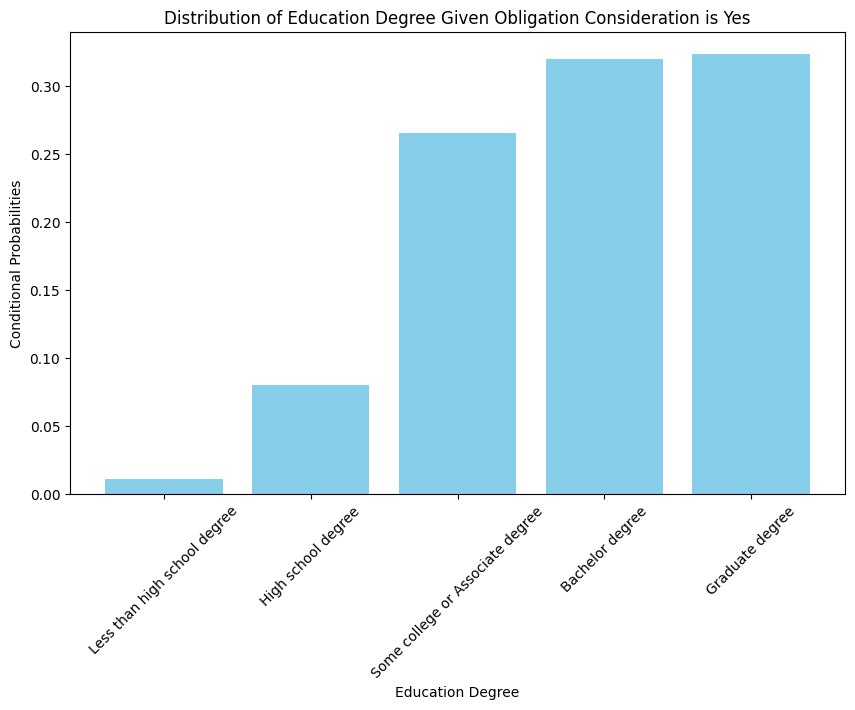

In [46]:
# Data for the plot
education_levels = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 
                    'Bachelor degree', 'Graduate degree']

education_obligation = calculate_conditional_probability(df, "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?", "Education")
print(education_obligation)


# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(education_levels, education_obligation.loc[1.0], color='skyblue')

# Adding title and labels
plt.title("Distribution of Education Degree Given Obligation Consideration is Yes")
plt.xlabel("Education Degree")
plt.ylabel("Conditional Probabilities")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [47]:
from features_trans_back import features_trans_back_shortened as ftbs
education_obligation.reset_index().columns[0]

'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'

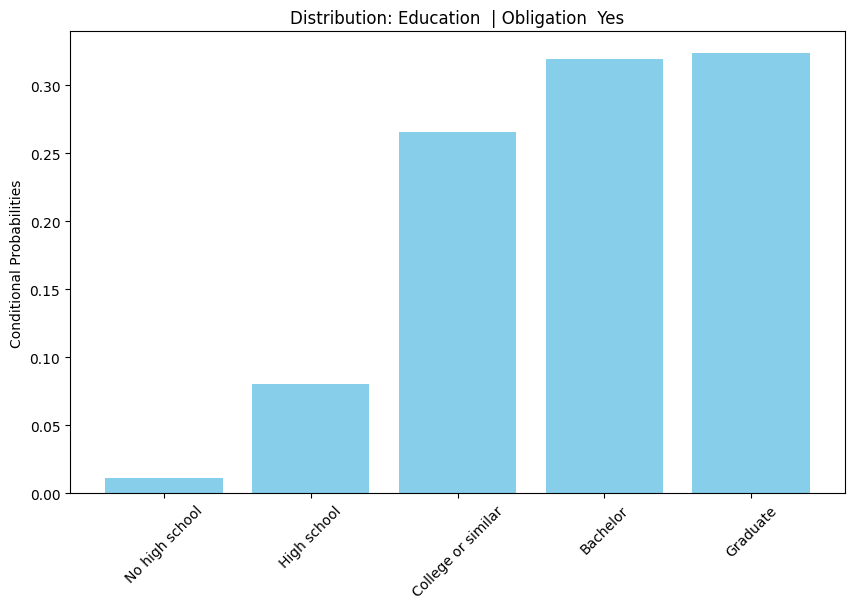

In [48]:
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs


def plot_conditional_probs(df, condition, ftbs, qs):
    # Data for the plot
    categories = ftbs(df.keys().name)
    categories_labels = list(categories.values())

    event_qs = df.keys().name

    condition_qs = df.reset_index().columns[0]

    # Creating the plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories_labels, df.loc[condition], color='skyblue')

    # Adding title and labels
    plt.title(f"Distribution: {qs(event_qs)}  | {qs(condition_qs)}  {ftbs(condition_qs, condition)}" )
    # plt.xlabel("Education Degree")
    plt.ylabel("Conditional Probabilities")

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    # plt.show()

plot_conditional_probs(education_obligation, 1.0, ftbs, qs)


In [56]:
print(df["On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?"].unique())
df_2 = pd.read_csv('flying-etiquette.csv')
print(df_2["On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?"].unique())


[nan  3.  2.  4.  1.]
[nan 'Twice' 'Three times' 'Once' 'Four times'
 'It is not okay to get up during flight' 'More than five times times']


#### Plots for Travel Frequency 

calculate_conditional_probability(df, condition_column, event_column):
plot_conditional_probs(df, condition, ftbs, qs)





Do you ever recline your seat when you fly?       0.0       1.0       2.0  \
How often do you travel by plane?                                           
1.0                                          0.170692  0.207729  0.125604   
2.0                                          0.108374  0.201970  0.182266   
4.0                                          0.500000  0.000000  0.000000   
5.0                                          0.333333  0.333333  0.000000   

Do you ever recline your seat when you fly?       3.0       4.0  
How often do you travel by plane?                                
1.0                                          0.289855  0.206119  
2.0                                          0.339901  0.167488  
4.0                                          0.000000  0.500000  
5.0                                          0.333333  0.000000  


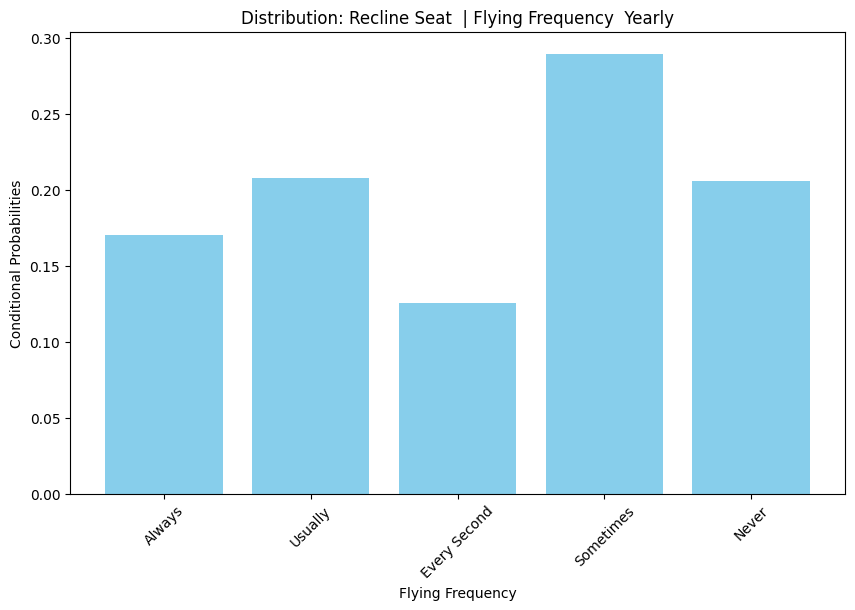

Do you have any children under 18?       0.0       1.0
How often do you travel by plane?                     
1.0                                 0.776699  0.223301
2.0                                 0.800000  0.200000
4.0                                 0.500000  0.500000
5.0                                 0.000000  1.000000


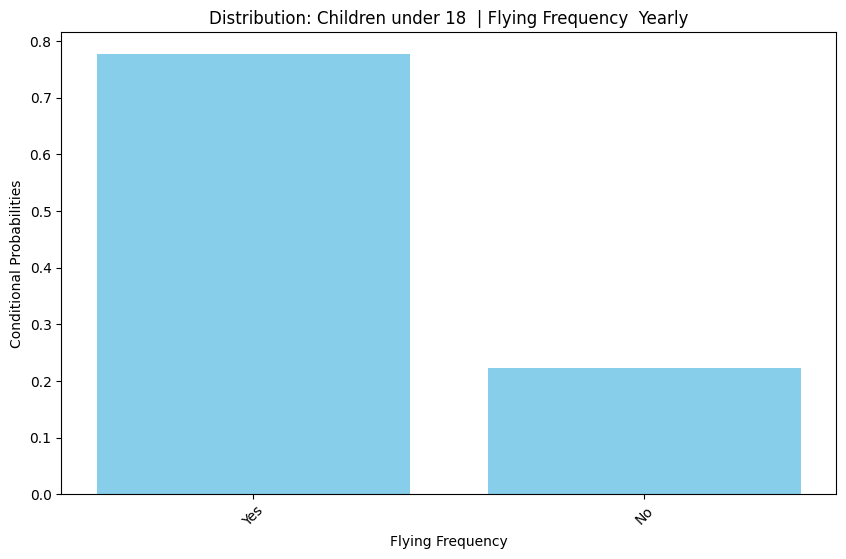

In a row of three seats, who should get to use the two arm rests?       1.0  \
How often do you travel by plane?                                             
1.0                                                                0.016129   
2.0                                                                0.034653   
4.0                                                                0.000000   
5.0                                                                0.333333   

In a row of three seats, who should get to use the two arm rests?       2.0  \
How often do you travel by plane?                                             
1.0                                                                0.108065   
2.0                                                                0.079208   
4.0                                                                0.000000   
5.0                                                                0.333333   

In a row of three seats, who should get to use the

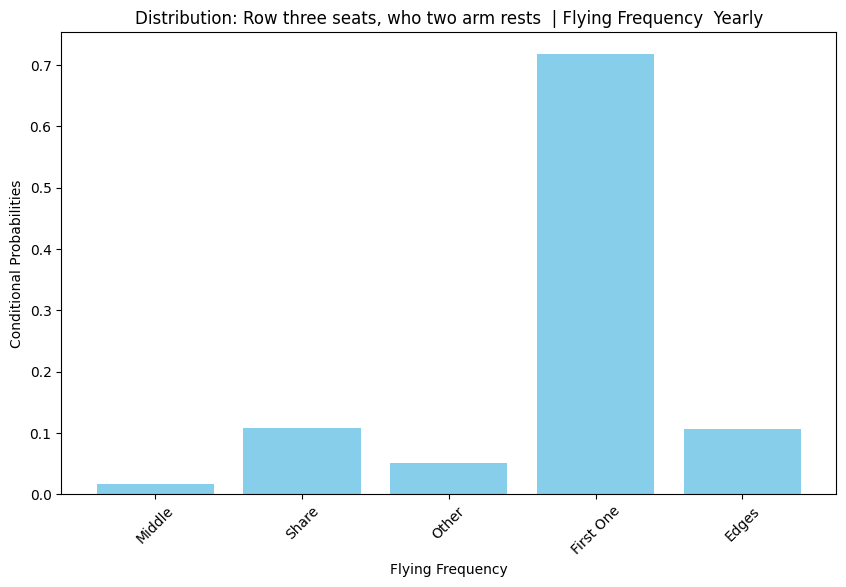

In a row of two seats, who should get to use the middle arm rest?       1.0  \
How often do you travel by plane?                                             
1.0                                                                0.048387   
2.0                                                                0.044554   
4.0                                                                0.000000   
5.0                                                                0.000000   

In a row of two seats, who should get to use the middle arm rest?       2.0  \
How often do you travel by plane?                                             
1.0                                                                0.158065   
2.0                                                                0.148515   
4.0                                                                0.000000   
5.0                                                                0.000000   

In a row of two seats, who should get to use the m

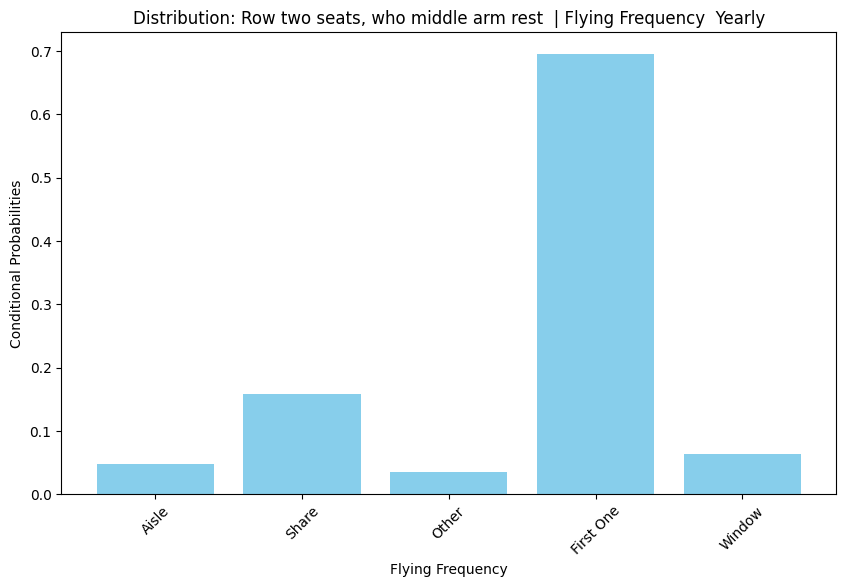

Who should have control over the window shade?       0.0       1.0
How often do you travel by plane?                                 
1.0                                             0.416129  0.583871
2.0                                             0.425743  0.574257
4.0                                             0.500000  0.500000
5.0                                             0.666667  0.333333


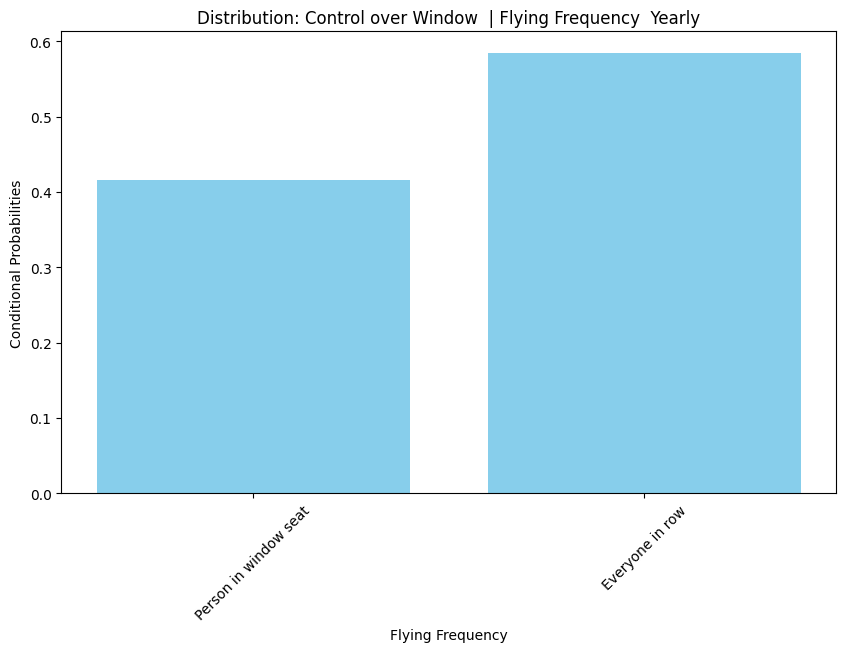

Is itrude to move to an unsold seat on a plane?       0.0       1.0       2.0
How often do you travel by plane?                                            
1.0                                              0.802908  0.158320  0.038772
2.0                                              0.836634  0.118812  0.044554
4.0                                              0.500000  0.000000  0.500000
5.0                                              0.000000  0.666667  0.333333


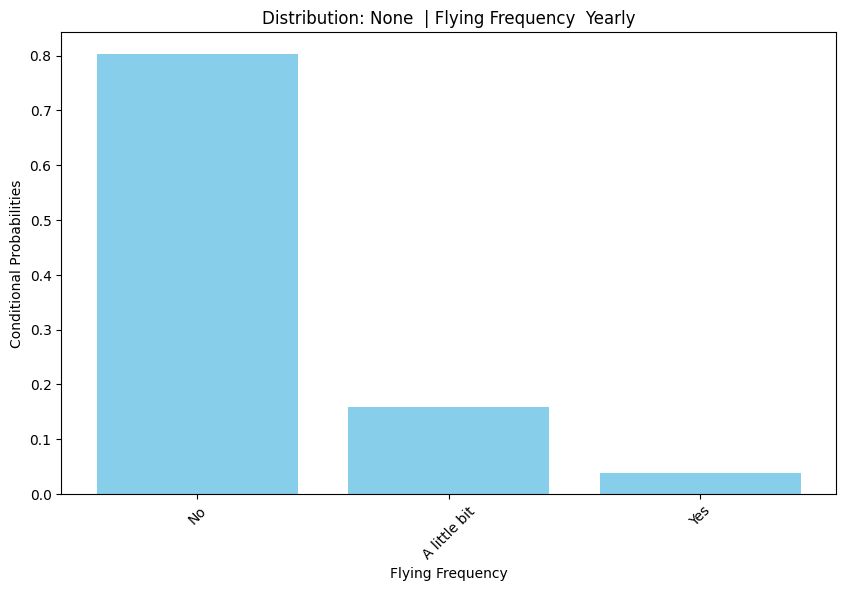

Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?       0.0  \
How often do you travel by plane?                                                                                      
1.0                                                                                                         0.793215   
2.0                                                                                                         0.816832   
4.0                                                                                                         0.500000   
5.0                                                                                                         0.000000   

Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?       1.0  \
How often do you travel by plane?                                                                                      
1.0                                    

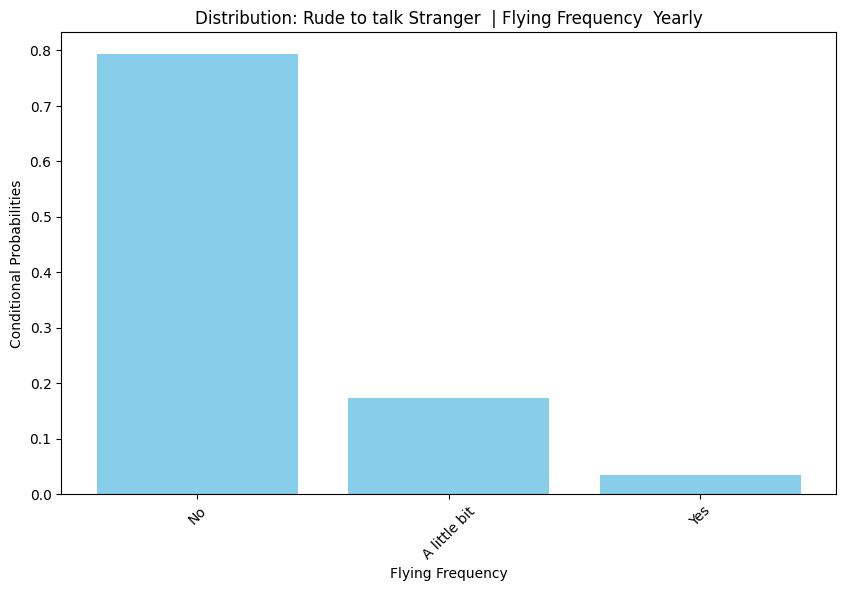

On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?       1.0  \
How often do you travel by plane?                                                                                        
1.0                                                                                                           0.143646   
2.0                                                                                                           0.168478   
4.0                                                                                                           0.000000   
5.0                                                                                                           0.000000   

On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?       2.0  \
How often do you travel by plane?                                                                                        
1.0                    

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (4,).

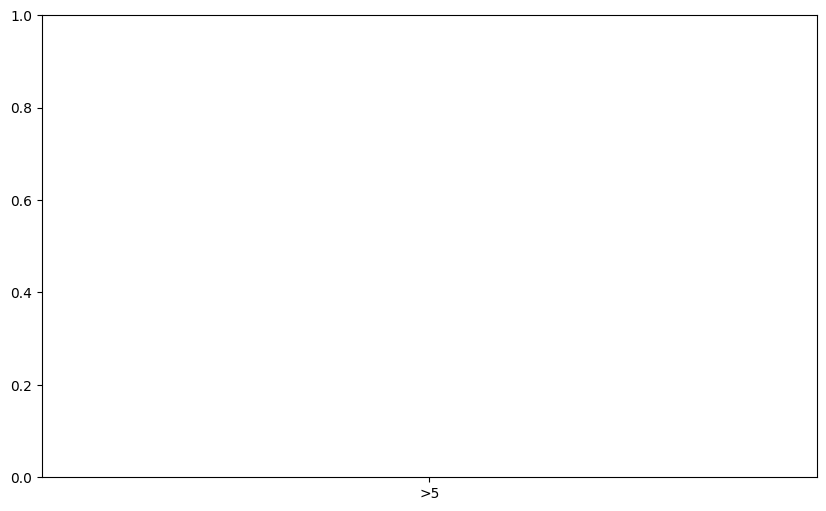

In [49]:

def many_plots (df, feature, calculate_conditional_probability, plot_conditional_probs, ftbs, qs):
    questions = list(df.columns)[1:]
    for q in questions:
        if q == feature:
            continue
        if q == 'How tall are you?':
            continue
        conditional_prob = calculate_conditional_probability(df, feature, q)
        print(conditional_prob)
        plot_conditional_probs(conditional_prob, 1.0, ftbs, qs)
        plt.xlabel("Flying Frequency")
        plt.show()
many_plots(df, 'How often do you travel by plane?', calculate_conditional_probability, plot_conditional_probs, ftbs, qs)


